### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Легиньких Галина
##### Группа:   НФИбд-02-21

##### Москва 2024
***

### Вариант № 6 (Wine Data Set)

1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder). 

2. Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.

3. Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений. 

4. При помощи класса `SelectKBest` библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с (дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра `score_func` значения `chi2` или `f_classif`. 

5. Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map). 

6. Визуализируйте набор данных в виде диаграммы рассеяния на плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

7. Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр `n_components`), для которой доля объясняемой дисперсии будет не менее 97.5%.

8. Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде диаграммы рассеяния на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

## Выполнение

1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder). 

Считала заданный набор данных из репозитария UCI. (У меня это Wine Data Set)

In [2]:
# данные из репозитария UCI
url = \
    "https://archive.ics.uci.edu/ml/"+\
    "machine-learning-databases/wine/wine.data"

In [3]:
import pandas as pd

wine = pd.read_csv(url, header=None)
wine.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',  'Magnesium', 'Total phenols', 
				'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',  'Color intensity', 'Hue',
				'OD280/OD315 of diluted wines', 'Proline']
wine.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Атрибуты:
1) Алкоголь
2) Яблочная кислота
3) Зола
4) Щелочность золы 
5) Магний
6) Общее количество фенолов
7) Флаваноиды
8) Нефлаваноидные фенолы
9) Проантоцианы
10) Интенсивность цвета
11) Оттенок
12) OD280/OD315 разбавленных вин
13)  Пролин 


2. Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.

Провела исследование набора данных, выявляя числовые признаки. Приобразовывать данные не пришлось, они все числовые. 

In [4]:
# размерность датафрейма
wine.shape

(178, 14)

In [5]:
# сводка статистик для числовых столбцов датафрейма
wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Проверила датафрейм на наличие пропущенных значений ('?'). Их нет.

In [7]:
import numpy as np

wine = wine.replace('?', np.NaN) # заменим '?' на np.NaN

In [8]:
print('Число пропущенных значений:')
for col in wine.columns:
    print("NaN in", col,"=", wine[col].isna().sum())

Число пропущенных значений:
NaN in Class = 0
NaN in Alcohol = 0
NaN in Malic acid = 0
NaN in Ash = 0
NaN in Alcalinity of ash = 0
NaN in Magnesium = 0
NaN in Total phenols = 0
NaN in Flavanoids = 0
NaN in Nonflavanoid phenols = 0
NaN in Proanthocyanins = 0
NaN in Color intensity = 0
NaN in Hue = 0
NaN in OD280/OD315 of diluted wines = 0
NaN in Proline = 0


3. Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений. 

Меткой класса является столбец class. Он имеет роль Target и является категориальной переменной, что означает, что он используется для обозначения класса или категории, к которой относится каждая запись в данных.

In [9]:
wine['Class'].nunique()

3

Столбец имеет 3 различных значения, поэтому выполнять дескритизацию этого столбца не нужно.

Text(0, 0.5, 'Count')

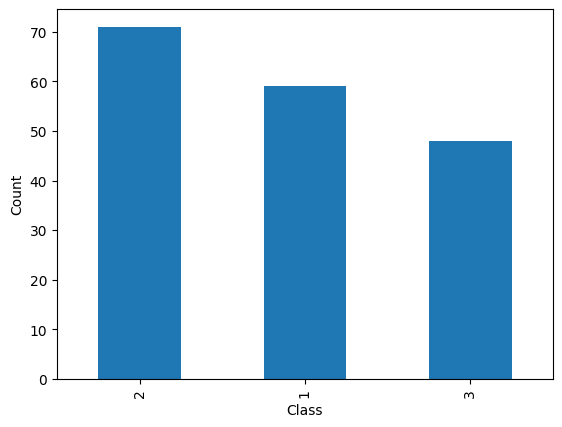

In [10]:
import matplotlib.pyplot as plt 

s = wine.Class.value_counts()
s.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')


4. При помощи класса `SelectKBest` библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с (дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра `score_func` значения `chi2` или `f_classif`. 

Нашла с помощью класса `SelectKBest` библиотеки scikit-learn 2 признака (Proanthocyanins и OD280/OD315 of diluted wines), имеющих наиболее выраженную взаимосвязь со столбцом с меткой класса.

**X**: Включает все столбцы, кроме целевого, т.е. со второго по четырнадцатый (или wine.iloc[:, 1:14]).

**Y**: Целевая переменная class, которая находится в первом столбце (или wine.iloc[:, 0]).

In [11]:
import sklearn
# отбор признаков при помощи одномерных статистических тестов 
from sklearn.feature_selection import SelectKBest,chi2


array = wine.values
X = wine.iloc[:,1:14] # Все признаки, начиная со второго столбца
Y = wine.iloc[:,0]   # Первый столбец - метка класса (целевой столбец)

# отбор признаков
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, Y)

# оценки признаков
print("\nОценки признаков:\n",fit.scores_)

cols = test.get_support(indices=True)
wine_new = wine.iloc[:,cols]
print("\nОтобранные признаки:\n",wine_new.head())


Оценки признаков:
 [5.44549882e+00 2.80686046e+01 7.43380598e-01 2.93836955e+01
 4.50263809e+01 1.56230759e+01 6.33343081e+01 1.81548480e+00
 9.36828307e+00 1.09016647e+02 5.18253981e+00 2.33898834e+01
 1.65400671e+04]

Отобранные признаки:
    Proanthocyanins  OD280/OD315 of diluted wines
0             2.29                          3.92
1             1.28                          3.40
2             2.81                          3.17
3             2.18                          3.45
4             1.82                          2.93


5. Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map). 

Вычислила матрицу корреляций для найденных признаков и столбца с меткой класса.

In [12]:
corr_matrix = wine[['Class','Proanthocyanins','OD280/OD315 of diluted wines']].corr()
corr_matrix

,Class,Proanthocyanins,OD280/OD315 of diluted wines
Class,1.00000,-0.499130,-0.788230
Proanthocyanins,-0.49913,1.000000,0.519067
OD280/OD315 of diluted wines,-0.78823,0.519067,1.000000


Визуализировала матрицу корреляций в виде тепловой карты.

Text(0.5, 1.0, 'Тепловая карта корреляционной матрицы')

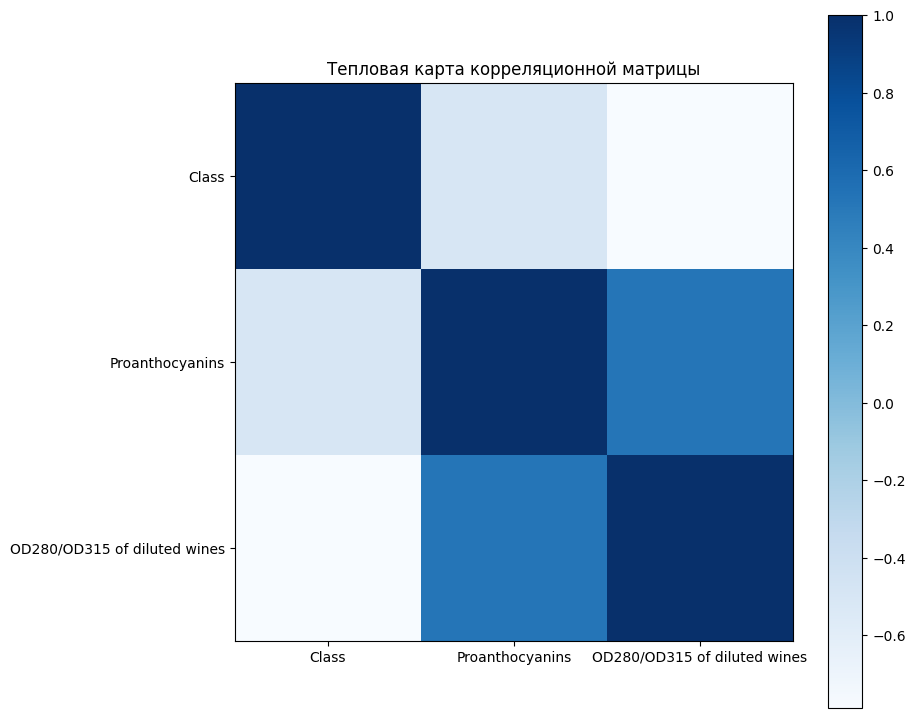

In [13]:
plt.figure(figsize=(9, 9))
plt.imshow(corr_matrix, cmap='Blues')
plt.colorbar()  # добавим шкалу интенсивности цвета

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index)

# Добавляем заголовок
plt.title('Тепловая карта корреляционной матрицы')

6. Визуализируйте набор данных в виде диаграммы рассеяния на плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

Визуализировала набор данных в виде диаграммы рассеяния.

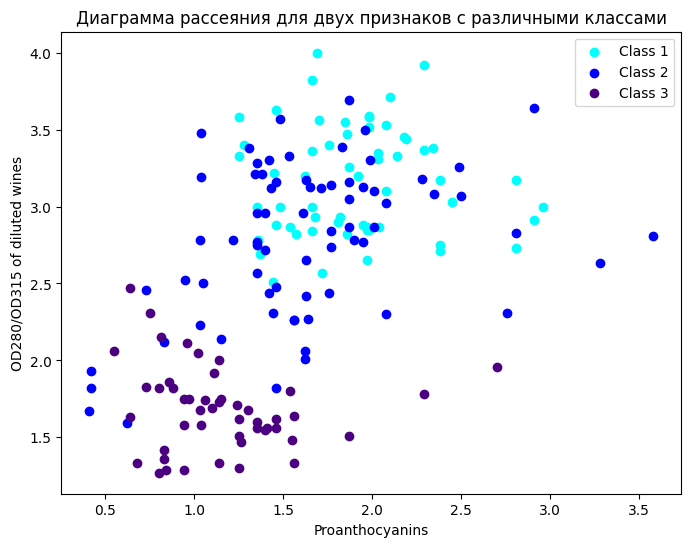

In [14]:
X_feature1 = wine['Proanthocyanins']
X_feature2 = wine['OD280/OD315 of diluted wines']
Y_class = wine['Class']  # Целевая переменная (класс)

# Настроим цветовую палитру для классов
colors = ['aqua', 'blue', 'indigo']  # Задаем цвета для каждого класса

plt.figure(figsize=(8, 6))

# Построение диаграммы рассеяния
for class_value in wine['Class'].unique():
    plt.scatter(X_feature1[Y_class == class_value], 
                X_feature2[Y_class == class_value], 
                label=f'Class {class_value}', # Задает метку для текущего класса в легенде диаграммы
                color=colors[class_value-1]) #Цвет

# Подписи осей и заголовок
plt.xlabel('Proanthocyanins')
plt.ylabel('OD280/OD315 of diluted wines')
plt.title('Диаграмма рассеяния для двух признаков с различными классами')

# Легенда
plt.legend()

# Отображение диаграммы
plt.show()


7. Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр `n_components`), для которой доля объясняемой дисперсии будет не менее 97.5%.

Вывела на экран размерность метода главных компонент, для которой доля объясняемой дисперсии будет не менее 97.5%.

In [15]:
from sklearn.decomposition import PCA 

for r in range(1,15):
  pca = PCA( n_components = r )
  pca.fit(wine)
  if sum(pca.explained_variance_ratio_)*100 >= 97.5:
    print("Размерность для объяснения 97.5% дисперсии:", r)
    break  

Размерность для объяснения 97.5% дисперсии: 1


8. Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде диаграммы рассеяния на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

Снизила размерность набора данных до двух признаков и изобразила полученный набор данных в виде диаграммы рассеяния на плоскости

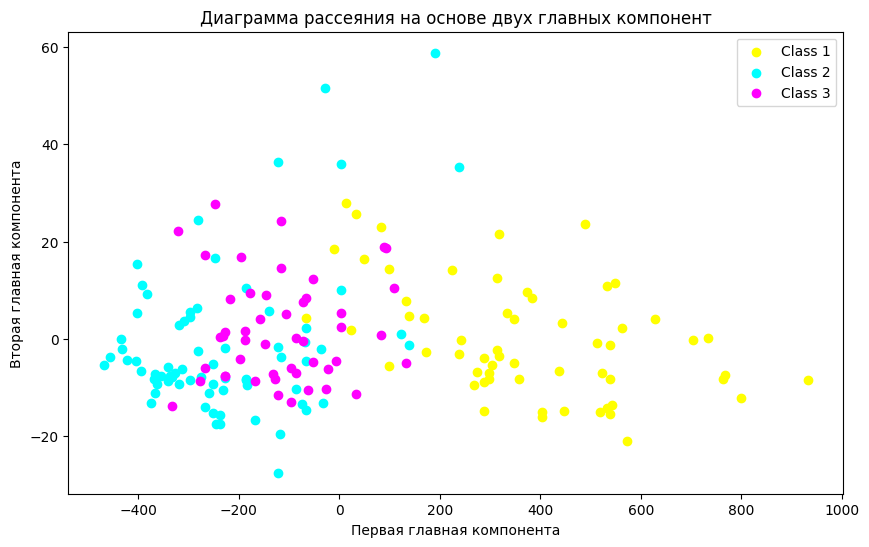

In [16]:
pca = PCA(n_components=2)
pcad = pca.fit_transform(wine)
Y = wine['Class']

plt.figure(figsize=(10, 6))
colors = ['yellow', 'cyan', 'magenta']
for class_value in wine['Class'].unique():  # Визуализация точек для каждого класса
    plt.scatter(pcad[Y == class_value, 0], pcad[Y == class_value, 1], 
                label=f'Class {class_value}', color=colors[class_value-1])

plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Диаграмма рассеяния на основе двух главных компонент')
plt.legend()